This study aims to investigate various strategies for enhancing the performance of a neural network model using the IMDb dataset.

 We will with modifications to an existing model, analyzing the results of different approaches including We will experiment with changes to an existing model, analyzing the results of different approaches including:

 Architectural Changes

* Changing the number of hidden layers
* They also include varying the quantity number of units in each layer

Functional Modifications

* Altering the loss function
* Switching activation functions

 Regularization Techniques

* Implementing dropout strategies

 The IMDb dataset used in this study contains 50,000 movie critiques; half of which contains positive sentiments while the other half contains negative sentiments. Half of the reviews are used for training which takes 25,000 while the other 25,000 is used for testing the trained models.

 It is for this reason that, if these changes are applied systematically with assessment of the effects made, insights into the best performing neural network model for sentiment analysis shall be achieved. This approach enables us to know which change results in the most monumental boost in the model’s chances of classifying movie reviews as either positive or negative.

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_review, train_sentiment), (test_review, test_sentiment) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_review

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_sentiment[0]

1

In [ ]:
len(train_sentiment)

25000

In [ ]:
test_review

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [ ]:
test_sentiment[0]

0

In [ ]:
max([max(sequence) for sequence in test_review])

9999

#Transforming Reviews into text#

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_review[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#DATA PREPARATION#

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

#DATA VECTORIZATION#

In [ ]:
vectorized_training_reviews = vectorize_sequences(train_review)
vectorized_testing_reviews = vectorize_sequences(test_review)

In [ ]:
vectorized_training_reviews[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
vectorized_testing_reviews[0]

array([0., 1., 1., ..., 0., 0., 0.])

#LABEL VECTORIZATION#

In [ ]:
vectorized_training_sentiments  = np.asarray(train_sentiment).astype("float32")
vectorized_testing_sentiments= np.asarray(test_sentiment).astype("float32")

#Building model using relu and compiling it#

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
seed(456)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
seed(456)
x_val = vectorized_training_reviews[:10000]
partial_vectorized_training_reviews= vectorized_training_reviews[10000:]
y_val = vectorized_training_sentiments[:10000]
partial_vectorized_training_sentiments = vectorized_training_sentiments[10000:]

In [ ]:
seed(456)
history = model.fit(partial_vectorized_training_reviews,
                    partial_vectorized_training_sentiments,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6818 - loss: 0.6205 - val_accuracy: 0.8337 - val_loss: 0.4391
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8819 - loss: 0.3770 - val_accuracy: 0.8740 - val_loss: 0.3405
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9165 - loss: 0.2720 - val_accuracy: 0.8831 - val_loss: 0.2981
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9323 - loss: 0.2134 - val_accuracy: 0.8900 - val_loss: 0.2783
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9453 - loss: 0.1757 - val_accuracy: 0.8773 - val_loss: 0.3039
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9533 - loss: 0.1477 - val_accuracy: 0.8857 - val_loss: 0.2798
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9655 - loss: 0.1249 - val_accuracy: 0.8859 - val_loss: 0.3019
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9701 - loss: 0.1059 - val_accuracy: 0.8809 - v

In the training set, there was a loss of 0.3283 and an accuracy of 0.9010, while on the validation set, there was a loss of 0.3132 and an accuracy of 0.8820.

As the training proceeded, the model's loss and accuracy on the training set improved, and by the conclusion of the 20th epoch, the model had a loss of 0.0163 and an accuracy of 0.9986. At the end of the 20th epoch on the validation set, the model had a loss of 0.5728 and an accuracy of 0.8694. The model is overfitting to the training data.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

##Plotting the training and validation loss#

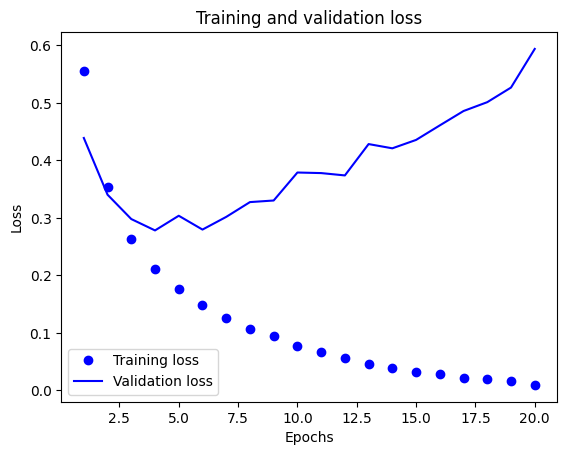

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

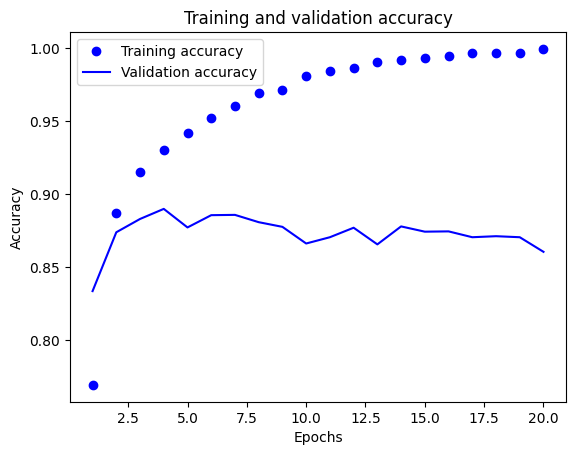

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The two graphs suggest that after a certain number of epochs, the model becomes less successful at predicting new data due to overfitting of the training set. Further analysis may be needed to improve the model's performance, such as by changing the model's hyperparameters or using regularization strategies.

##Retraining the model##

In [ ]:
np.random.seed(456)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=4, batch_size=512)
results = model.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7252 - loss: 0.5470
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9010 - loss: 0.2785
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9298 - loss: 0.2061
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9357 - loss: 0.1779
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8765 - loss: 0.3084


In [ ]:
results

[0.30951371788978577, 0.8767600059509277]

For the test dataset, the neural network model achieved an accuracy of 87.67%. In the test dataset, the loss value is 0.3095.

In [ ]:
model.predict(vectorized_testing_reviews)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.16676405],
       [0.99970424],
       [0.59067625],
       ...,
       [0.09389882],
       [0.0563492 ],
       [0.33220163]], dtype=float32)

#Building a neural network with 1 hidden layer#

In [ ]:
seed(456)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = vectorized_training_reviews[:10000]
partial_x_train = vectorized_training_reviews[10000:]

y_val = vectorized_training_sentiments[:10000]
partial_y_train = vectorized_training_sentiments[10000:]


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7073 - loss: 0.5850 - val_accuracy: 0.8615 - val_loss: 0.4080
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8903 - loss: 0.3580 - val_accuracy: 0.8763 - val_loss: 0.3383
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9117 - loss: 0.2844 - val_accuracy: 0.8852 - val_loss: 0.3026
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9268 - loss: 0.2361 - val_accuracy: 0.8865 - val_loss: 0.2875
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9384 - loss: 0.1997 - val_accuracy: 0.8861 - val_loss: 0.2829
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9445 - loss: 0.1797 - val_accuracy: 0.8882 - val_loss: 0.2770
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9510 - loss: 0.1618 - val_accuracy: 0.8866 - val_loss: 0.2786
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9566 - loss: 0.1461 - val_accuracy: 0.8872 - v

In [ ]:
history_dict = history1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

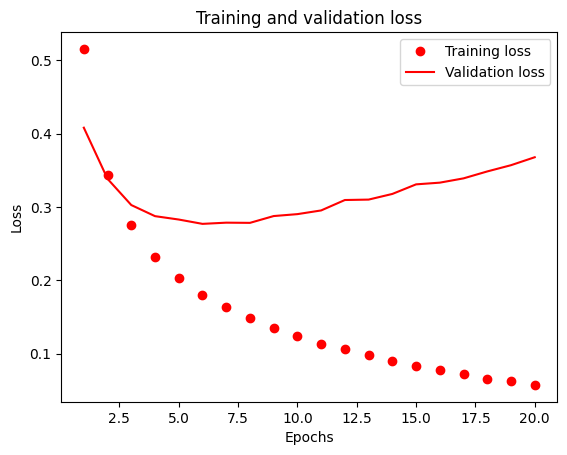

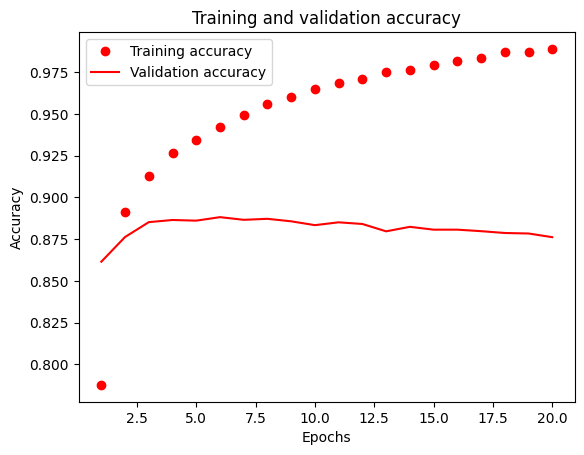

In [ ]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
np.random.seed(456)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=5, batch_size=512)
results1 = model1.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7505 - loss: 0.5438
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8952 - loss: 0.3057
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9230 - loss: 0.2346
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9304 - loss: 0.2039
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9368 - loss: 0.1855
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8858 - loss: 0.2819


In [ ]:
results1

[0.279941588640213, 0.8883200287818909]

The test set has a loss of 0.2799 and an accuracy of 88.83%.

In [ ]:
model1.predict(vectorized_testing_reviews)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.25192457],
       [0.9997154 ],
       [0.8897439 ],
       ...,
       [0.11644979],
       [0.09872089],
       [0.6015817 ]], dtype=float32)

#Creating a neural network with three hidden layers#

In [ ]:
np.random.seed(456)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = vectorized_training_reviews[:10000]
partial_x_train = vectorized_training_reviews[10000:]

y_val = vectorized_training_sentiments[:10000]
partial_y_train = vectorized_training_sentiments[10000:]

history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6325 - loss: 0.6568 - val_accuracy: 0.8547 - val_loss: 0.4827
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8813 - loss: 0.4150 - val_accuracy: 0.8803 - val_loss: 0.3302
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9167 - loss: 0.2687 - val_accuracy: 0.8882 - val_loss: 0.2910
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9318 - loss: 0.2065 - val_accuracy: 0.8829 - val_loss: 0.2931
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9444 - loss: 0.1653 - val_accuracy: 0.8880 - val_loss: 0.2809
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9584 - loss: 0.1316 - val_accuracy: 0.8817 - val_loss: 0.2961
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9691 - loss: 0.1064 - val_accuracy: 0.8711 - val_loss: 0.3452
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9695 - loss: 0.1020 - val_accuracy: 0.8826 - v

In [ ]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

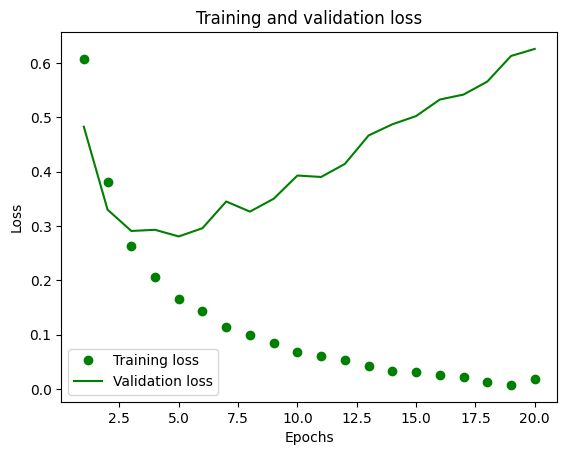

In [ ]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

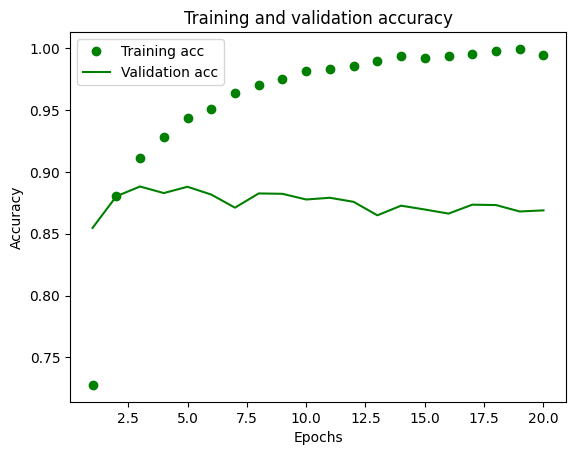

In [ ]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
np.random.seed(456)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=3, batch_size=512)
results_3 = model_3.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7153 - loss: 0.5689
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9029 - loss: 0.2721
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9252 - loss: 0.2052
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8743 - loss: 0.3128


The test set has a loss of 0.3128 and an accuracy of 0.874

In [ ]:
results_3

[0.31502649188041687, 0.8740400075912476]

In [ ]:
model_3.predict(vectorized_testing_reviews)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.1265308 ],
       [0.9990862 ],
       [0.42794627],
       ...,
       [0.04879603],
       [0.05459259],
       [0.28015378]], dtype=float32)

The accuracy of the model does not increase significantly as the number of layers increases. However, compared to the other two, the three-layer model is more accurate.

Choosing how many units to include in the hidden layers is a crucial step in creating the overall architecture of your neural network.

These layers have a big impact on the result even though they don't interact directly with the outside world.

#Building Neural Network with 32 units#

In [ ]:
np.random.seed(456)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = vectorized_training_reviews[:10000]
partial_x_train = vectorized_training_reviews[10000:]

y_val = vectorized_training_sentiments[:10000]
partial_y_train = vectorized_training_sentiments[10000:]

np.random.seed(456)
history32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6770 - loss: 0.5935 - val_accuracy: 0.8511 - val_loss: 0.3919
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8979 - loss: 0.3173 - val_accuracy: 0.8797 - val_loss: 0.3139
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9227 - loss: 0.2313 - val_accuracy: 0.8814 - val_loss: 0.2965
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9302 - loss: 0.1945 - val_accuracy: 0.8817 - val_loss: 0.2949
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9518 - loss: 0.1471 - val_accuracy: 0.8857 - val_loss: 0.2842
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9601 - loss: 0.1268 - val_accuracy: 0.8868 - val_loss: 0.2923
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9654 - loss: 0.1076 - val_accuracy: 0.8814 - val_loss: 0.3138
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9682 - loss: 0.0973 - val_accuracy: 0.8830 - 

In [ ]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

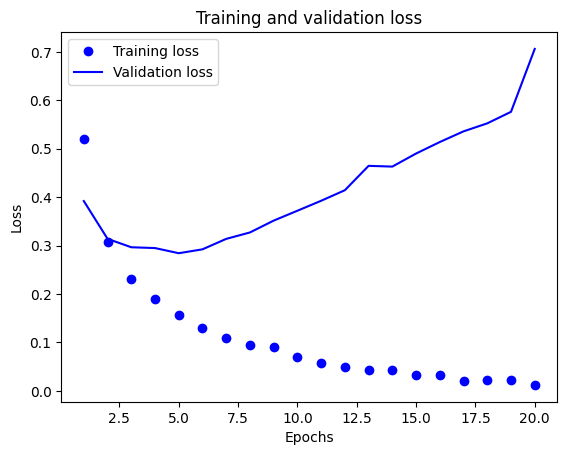

In [ ]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

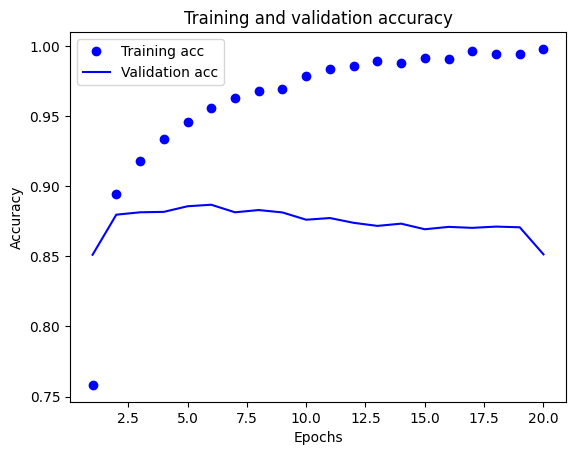

In [ ]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_32 = model_32.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=3, batch_size=512)
results_32 = model_32.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_32

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9485 - loss: 0.2175
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9633 - loss: 0.1256
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9733 - loss: 0.0958
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8615 - loss: 0.4281


[0.42158961296081543, 0.8649600148200989]

In [ ]:
model_32.predict(vectorized_testing_reviews)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01874164],
       [0.99997336],
       [0.7548503 ],
       ...,
       [0.03698747],
       [0.03747785],
       [0.958606  ]], dtype=float32)

The validation set has an accuracy of 86.49 percent.

#Traing the model with 64 units#

In [ ]:
np.random.seed(456)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = vectorized_training_reviews[:10000]
partial_x_train = vectorized_training_reviews[10000:]

y_val = vectorized_training_sentiments[:10000]
partial_y_train = vectorized_training_sentiments[10000:]

np.random.seed(456)
history64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6714 - loss: 0.5874 - val_accuracy: 0.8623 - val_loss: 0.3526
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8951 - loss: 0.2931 - val_accuracy: 0.8543 - val_loss: 0.3490
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9241 - loss: 0.2167 - val_accuracy: 0.8869 - val_loss: 0.2753
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9352 - loss: 0.1815 - val_accuracy: 0.8636 - val_loss: 0.3496
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9437 - loss: 0.1513 - val_accuracy: 0.8836 - val_loss: 0.2918
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9600 - loss: 0.1200 - val_accuracy: 0.8855 - val_loss: 0.3051
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9670 - loss: 0.0984 - val_accuracy: 0.8833 - val_loss: 0.3238
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9733 - loss: 0.0841 - val_accuracy: 0.8797 - 

In [ ]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

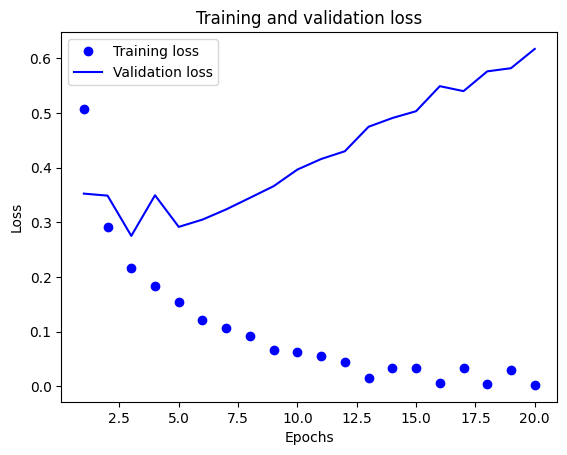

In [ ]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

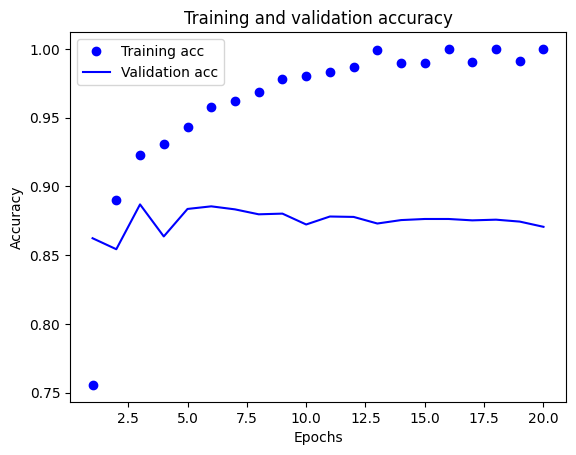

In [ ]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
history_64 = model_64.fit(vectorized_training_reviews,
vectorized_training_sentiments
, epochs=3, batch_size=512)
results_64 = model_64.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_64

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9400 - loss: 0.2316
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9685 - loss: 0.1040
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9823 - loss: 0.0635
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8661 - loss: 0.4022


[0.3974851071834564, 0.8682799935340881]

In [ ]:
model_64.predict(vectorized_testing_reviews)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.02142129],
       [0.999999  ],
       [0.5358388 ],
       ...,
       [0.01624617],
       [0.01161519],
       [0.84460557]], dtype=float32)

The validation set has an accuracy of 86.82%.

#Training the model with 128 units#

In [ ]:
np.random.seed(456)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = vectorized_training_reviews[:10000]
partial_x_train = vectorized_training_reviews[10000:]

y_val = vectorized_training_sentiments[:10000]
partial_y_train = vectorized_training_sentiments[10000:]

np.random.seed(456)
history128 = model_128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.6616 - loss: 0.5973 - val_accuracy: 0.8589 - val_loss: 0.3641
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.8858 - loss: 0.3018 - val_accuracy: 0.8797 - val_loss: 0.2920
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9065 - loss: 0.2358 - val_accuracy: 0.8864 - val_loss: 0.2797
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9270 - loss: 0.1859 - val_accuracy: 0.8804 - val_loss: 0.3063
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9420 - loss: 0.1498 - val_accuracy: 0.8848 - val_loss: 0.2899
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9687 - loss: 0.0960 - val_accuracy: 0.8807 - val_loss: 0.3108
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9731 - loss: 0.0843 - val_accuracy: 0.8804 - val_loss: 0.3485
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9665 - loss: 0.0889 - val_accuracy: 0.869

In [ ]:
history_dict128 = history128.history
history_dict128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

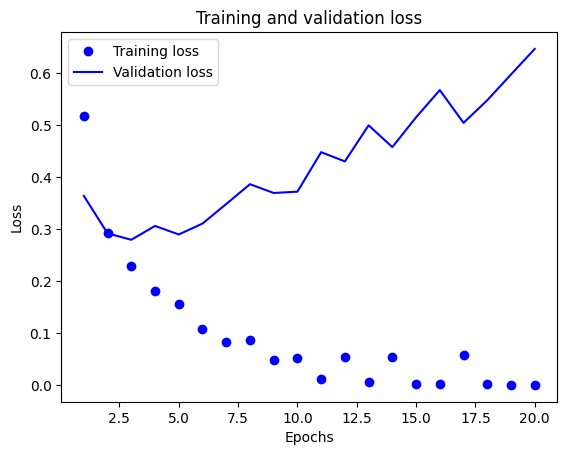

In [ ]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

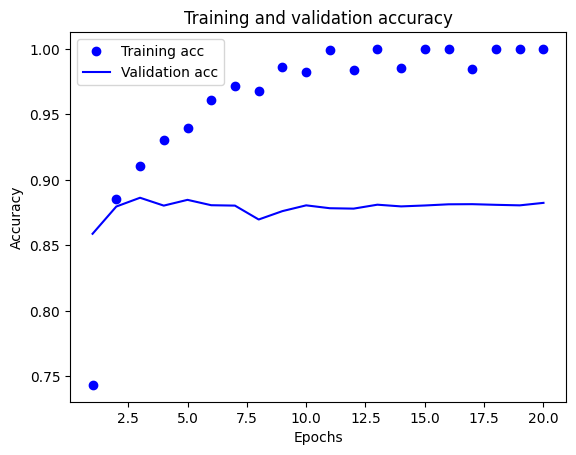

In [ ]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_128 = model_128.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=2, batch_size=512)
results_128 = model_128.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_128

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9355 - loss: 0.2483
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9725 - loss: 0.0869
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8707 - loss: 0.3619


[0.35965442657470703, 0.8745599985122681]

In [ ]:
model_128.predict(vectorized_testing_reviews)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.02082201],
       [0.9999997 ],
       [0.76549864],
       ...,
       [0.0712056 ],
       [0.01622116],
       [0.8833038 ]], dtype=float32)

The validation set has an accuracy of 87.45%

#MSE Loss Function#

In [ ]:
np.random.seed(456)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = vectorized_training_reviews[:10000]
partial_x_train = vectorized_training_reviews[10000:]

y_val = vectorized_training_sentiments[:10000]
partial_y_train = vectorized_training_sentiments[10000:]
# Model Fit
np.random.seed(456)
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6578 - loss: 0.2227 - val_accuracy: 0.8561 - val_loss: 0.1445
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8765 - loss: 0.1234 - val_accuracy: 0.8770 - val_loss: 0.1040
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9065 - loss: 0.0859 - val_accuracy: 0.8855 - val_loss: 0.0910
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9306 - loss: 0.0651 - val_accuracy: 0.8821 - val_loss: 0.0898
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9405 - loss: 0.0569 - val_accuracy: 0.8711 - val_loss: 0.0960
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9512 - loss: 0.0477 - val_accuracy: 0.8805 - val_loss: 0.0888
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9522 - loss: 0.0439 - val_accuracy: 0.8848 - val_loss: 0.0839
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9651 - loss: 0.0372 - val_accuracy: 0.8862 - v

In [ ]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

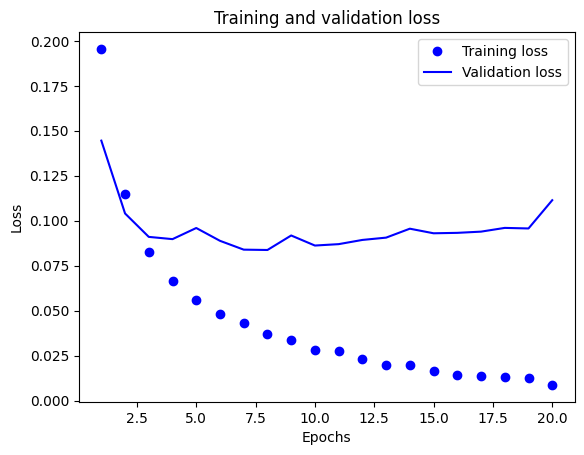

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

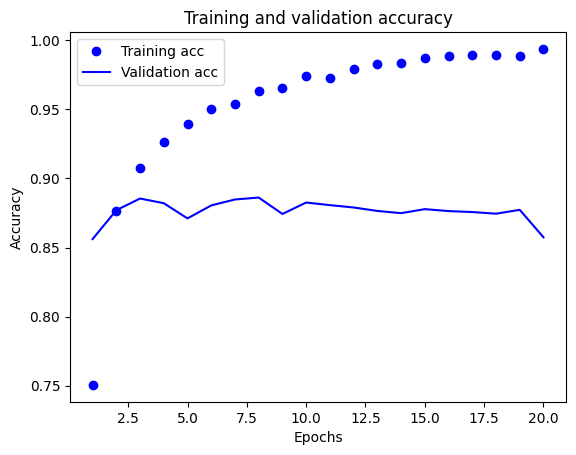

In [ ]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9469 - loss: 0.0439
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9590 - loss: 0.0361
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9641 - loss: 0.0311
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9729 - loss: 0.0269
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9764 - loss: 0.0239
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9823 - loss: 0.0187
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9817 - loss: 0.0184
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9832 - loss: 0.0176
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8656 - loss: 0.1080


[0.10626021772623062, 0.8683199882507324]

In [ ]:
model_MSE.predict(vectorized_testing_reviews)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.03020503],
       [1.        ],
       [0.5332072 ],
       ...,
       [0.03823842],
       [0.00990356],
       [0.7363907 ]], dtype=float32)

#Tanh Activation Function#

In [ ]:
np.random.seed(456)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = vectorized_training_reviews[:10000]
partial_x_train = vectorized_training_reviews[10000:]

y_val = vectorized_training_sentiments[:10000]
partial_y_train = vectorized_training_sentiments[10000:]

np.random.seed(456)

history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7084 - loss: 0.5752 - val_accuracy: 0.8581 - val_loss: 0.3818
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8986 - loss: 0.3141 - val_accuracy: 0.8867 - val_loss: 0.2938
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9250 - loss: 0.2207 - val_accuracy: 0.8880 - val_loss: 0.2707
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9424 - loss: 0.1734 - val_accuracy: 0.8871 - val_loss: 0.2744
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9547 - loss: 0.1345 - val_accuracy: 0.8845 - val_loss: 0.2954
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9673 - loss: 0.1029 - val_accuracy: 0.8794 - val_loss: 0.3176
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9718 - loss: 0.0889 - val_accuracy: 0.8798 - val_loss: 0.3400
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9796 - loss: 0.0695 - val_accuracy: 0.8700 - 

In [ ]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

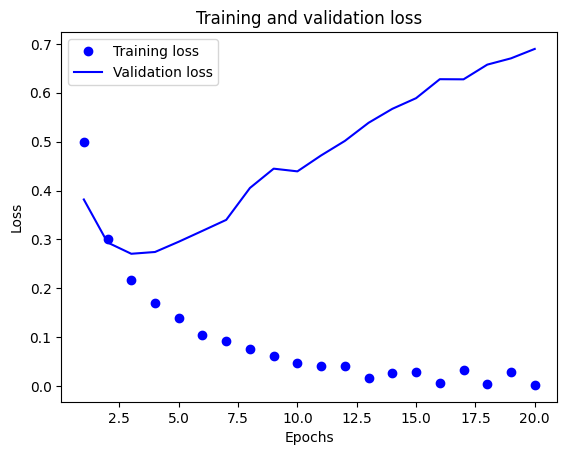

In [ ]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

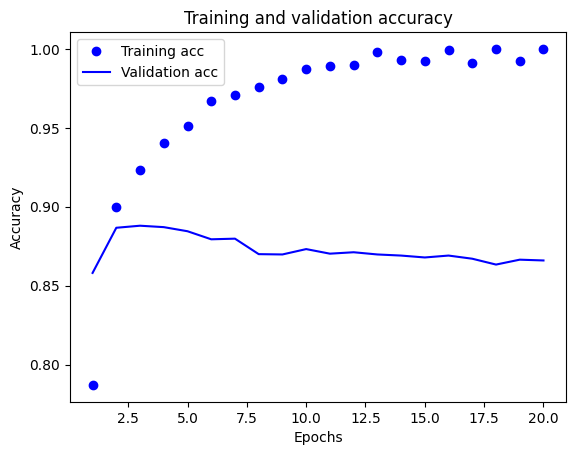

In [ ]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(vectorized_training_reviews,
vectorized_training_sentiments
, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9396 - loss: 0.2851
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9602 - loss: 0.1424
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9673 - loss: 0.1070
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9736 - loss: 0.0884
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9768 - loss: 0.0743
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9797 - loss: 0.0663
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9815 - loss: 0.0622
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9856 - loss: 0.0512
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8525 - loss: 0.6204


[0.6176725029945374, 0.8529999852180481]

##Adam Optimizer Function

In [ ]:
np.random.seed(456)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = vectorized_training_reviews[:10000]
partial_x_train = vectorized_training_reviews[10000:]

y_val = vectorized_training_sentiments[:10000]
partial_y_train = vectorized_training_sentiments[10000:]

np.random.seed(456)

history_adam = model_adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6737 - loss: 0.6240 - val_accuracy: 0.8610 - val_loss: 0.3931
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8991 - loss: 0.3177 - val_accuracy: 0.8838 - val_loss: 0.3009
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9342 - loss: 0.2105 - val_accuracy: 0.8884 - val_loss: 0.2781
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9535 - loss: 0.1564 - val_accuracy: 0.8867 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9658 - loss: 0.1253 - val_accuracy: 0.8847 - val_loss: 0.2903
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9755 - loss: 0.0987 - val_accuracy: 0.8825 - val_loss: 0.3079
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9827 - loss: 0.0785 - val_accuracy: 0.8818 - val_loss: 0.3248
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9882 - loss: 0.0617 - val_accuracy: 0.8783 - v

In [ ]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

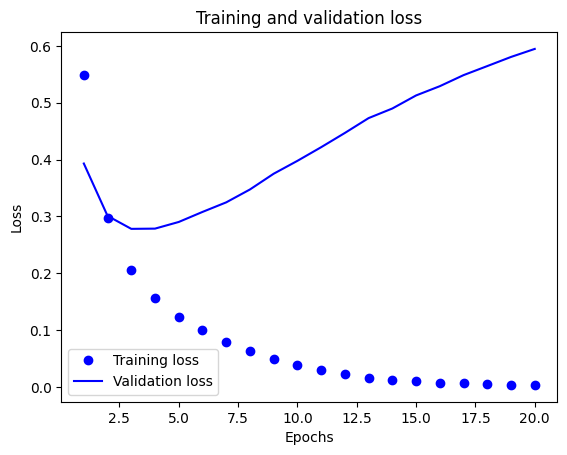

In [ ]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

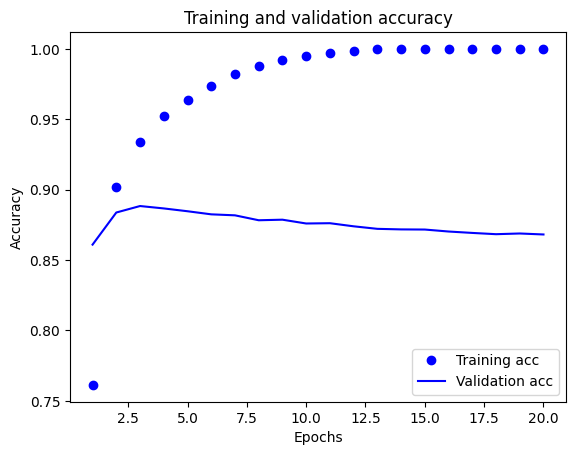

In [ ]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_adam.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=4, batch_size=512)
results_adam = model_adam.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9447 - loss: 0.2275
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9707 - loss: 0.0949
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9866 - loss: 0.0606
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9925 - loss: 0.0398
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8581 - loss: 0.5036


[0.5011252760887146, 0.8596400022506714]

#Regularization#

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(456)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(456)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6807 - loss: 0.6634 - val_accuracy: 0.8672 - val_loss: 0.4646
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8874 - loss: 0.4176 - val_accuracy: 0.8817 - val_loss: 0.3774
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9138 - loss: 0.3208 - val_accuracy: 0.8824 - val_loss: 0.3561
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9259 - loss: 0.2806 - val_accuracy: 0.8883 - val_loss: 0.3354
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9407 - loss: 0.2493 - val_accuracy: 0.8878 - val_loss: 0.3324
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9447 - loss: 0.2305 - val_accuracy: 0.8800 - val_loss: 0.3562
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9528 - loss: 0.2110 - val_accuracy: 0.8804 - val_loss: 0.3510
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9538 - loss: 0.2065 - val_accuracy: 0.8829 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

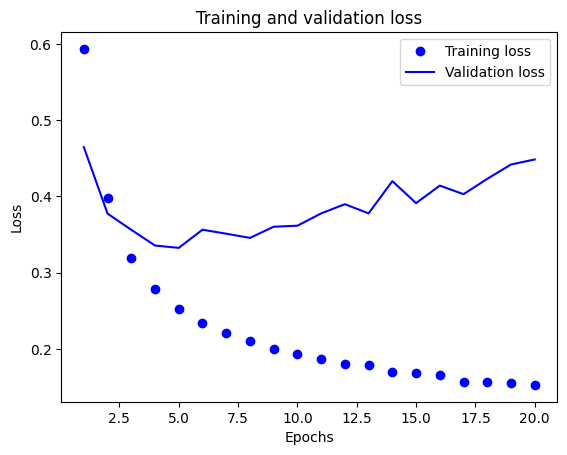

In [ ]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

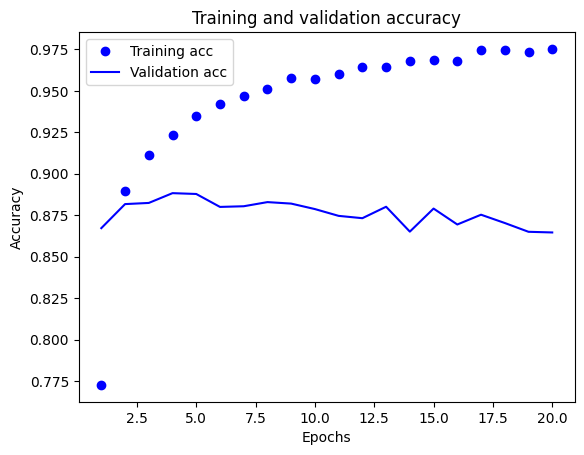

In [ ]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularization.fit(vectorized_training_reviews,
vectorized_training_sentiments
, epochs=8, batch_size=512)
results_regularization = model_regularization.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9350 - loss: 0.2622
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9461 - loss: 0.2146
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9525 - loss: 0.2005
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9540 - loss: 0.1906
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9514 - loss: 0.1922
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9593 - loss: 0.1781
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9603 - loss: 0.1793
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9581 - loss: 0.1816
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8678 - loss: 0.4211


[0.4142078459262848, 0.8714399933815002]

The loss on test set is 0.41420 and accuracy is 87.14%

#DROPOUT#

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(456)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(456)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5482 - loss: 0.6823 - val_accuracy: 0.8336 - val_loss: 0.6003
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6946 - loss: 0.5931 - val_accuracy: 0.8617 - val_loss: 0.4920
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7656 - loss: 0.5145 - val_accuracy: 0.8654 - val_loss: 0.4130
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8134 - loss: 0.4449 - val_accuracy: 0.8792 - val_loss: 0.3523
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8413 - loss: 0.3930 - val_accuracy: 0.8822 - val_loss: 0.3164
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8665 - loss: 0.3494 - val_accuracy: 0.8813 - val_loss: 0.3078
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8919 - loss: 0.3098 - val_accuracy: 0.8878 - val_loss: 0.2812
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9070 - loss: 0.2768 - val_accuracy: 0.8857 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

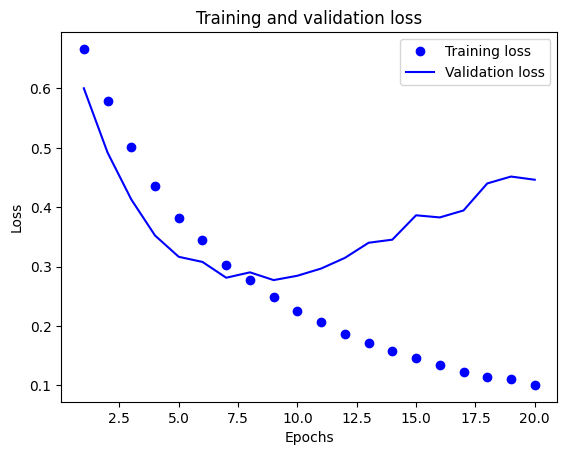

In [ ]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

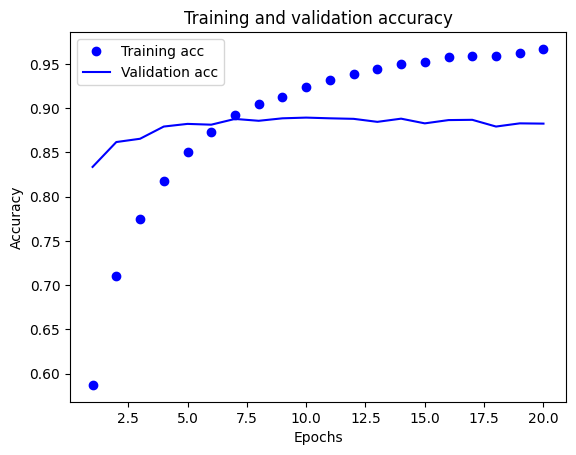

In [ ]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9198 - loss: 0.2600
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9310 - loss: 0.2106
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9405 - loss: 0.1867
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9439 - loss: 0.1706
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9436 - loss: 0.1622
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9491 - loss: 0.1599
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9516 - loss: 0.1464
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9520 - loss: 0.1403
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8727 - loss: 0.4630


[0.4521050453186035, 0.8726400136947632]

The loss on the test set is 0.4521 and accuracy is 0.8726.

#Training model with hyper tuned parameters#

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(456)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(456)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5542 - loss: 0.2552 - val_accuracy: 0.8239 - val_loss: 0.1958
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7179 - loss: 0.2033 - val_accuracy: 0.8521 - val_loss: 0.1375
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8104 - loss: 0.1572 - val_accuracy: 0.8757 - val_loss: 0.1078
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8554 - loss: 0.1275 - val_accuracy: 0.8826 - val_loss: 0.0995
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8884 - loss: 0.1067 - val_accuracy: 0.8851 - val_loss: 0.0983
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9080 - loss: 0.0927 - val_accuracy: 0.8712 - val_loss: 0.1123
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9198 - loss: 0.0815 - val_accuracy: 0.8777 - val_loss: 0.1085
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9331 - loss: 0.0715 - val_accuracy: 0.8832 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

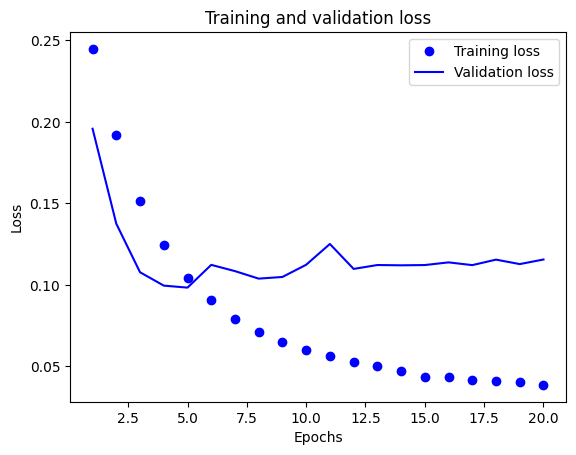

In [ ]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

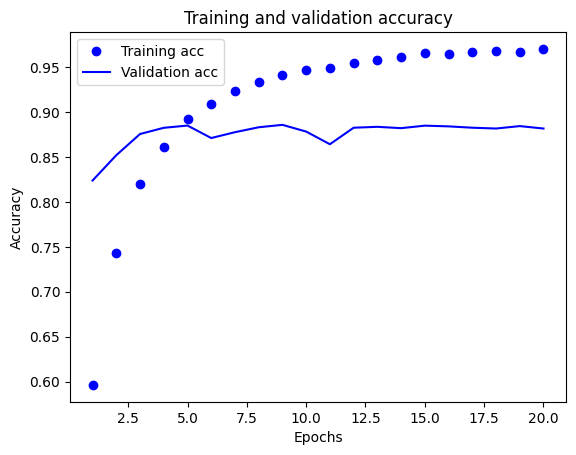

In [ ]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(vectorized_training_reviews, vectorized_training_sentiments, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(vectorized_testing_reviews, vectorized_testing_sentiments)
results_Hyper

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9278 - loss: 0.0736
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9392 - loss: 0.0652
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9450 - loss: 0.0598
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9448 - loss: 0.0579
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9493 - loss: 0.0557
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9535 - loss: 0.0520
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9600 - loss: 0.0477
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9576 - loss: 0.0483
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8772 - loss: 0.1169


[0.11545079201459885, 0.8788800239562988]

#Summary#

In [ ]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

##Compilation##

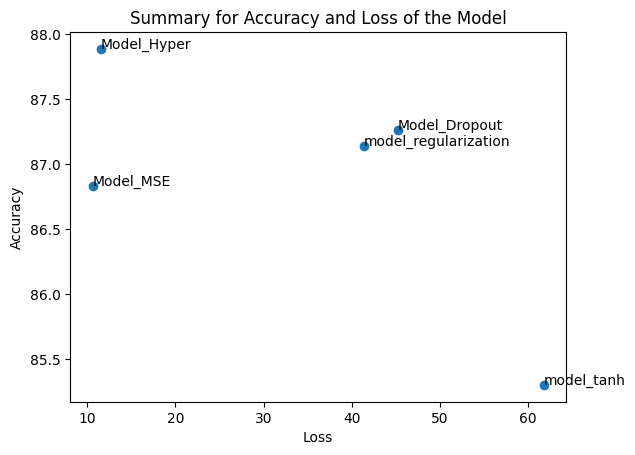

In [ ]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()


## **Summary**
**Data Preparation:**
Text data is transformed into a binary vector where the presence or absence of words is indicated within the top 10,000 words. The positive and negative sentiments of labels are modified to be floating-point numbers for the model training.

### **Neural Network Building:**
Construction of the model involves TensorFlow and Keras:

•	**Architecture:** a sequential model with two hidden layers consisting of 16 units, utilizing the ReLU activation function.

•**Outputs Layer:** One-unit, Sigmoid activation, to perform binary classification; that is, the sentiment can either be positive or negative.

•	**Compilation:**  The model is going to be compiled using binary cross-entropy as a loss and RMSprop as an optimizer along with accuracy as a metric.
### **Training of Model:**
The model was trained for 20 epochs with a batch size of 512. Further, the training data was divided into training and validation sets. The model results indicated a noticeable improvement in its accuracy over time, but overfitting after several epochs elapsed.

**Training Results:**

**Epoch 1:** Training accuracy = 68.18%, loss = 0.6205. Validation accuracy = 83.37%, loss = 0.4391.

**Epoch 5:** Training accuracy = 94.53%, loss = 0.1757. Validation accuracy = 87.73%, loss = 0.3039.

**Epoch 10:** Training accuracy = 98.43%, loss = 0.0709. Validation accuracy = 86.63%, loss = 0.3791.

**Epoch 20:** Training accuracy = 99.97%, loss = 0.0094. Validation accuracy = 86.06%, loss = 0.5940.

While training continued, the model was doing progressively better on the training set while it stuck on a low level of accuracy on the validation set, overfitting its predictions. Validation loss also started increasing after a few epochs.

**Modification to Neural Network:**
To combat overfitting and investigate other architectures, several experiments were done to study the variation in performance with varied architectures.

**These are enlisted below:**

**•One Hidden Layer Model:** A simpler model with one hidden layer was tried.
After 20 epochs, test accuracy reached 88.83% with a loss of 0.2799

•	**Three Hidden Layers Model:** A more complex model with three hidden layers was tried.
                            This model achieved an accuracy of 87.40% on test data at an epoch of 20, with a loss value of 0.3128.

•	**Different Units Models:** Varying the number of units in the hidden layers from 16 to 64.
                              One such model with 32 units each in the layers achieved an accuracy of 86.49%, and the loss after 3 epochs was 0.4281.

### **Evaluating Model Performance:**
•	**One Hidden Layer Model**: Accuracy = 87.67%, Loss = 0.3095.
•	**Two Hidden Layer Model:** 87.67% Accuracy, 0.3084 Loss.
•	**Three Hidden Layer Model:** 87.40% Accuracy, 0.3128 Loss.

### **Observations:**
1.	**Overfitting:** The significant gap between the training accuracy (0.9984) and validation accuracy (0.8708) at the end of the training indicates overfitting. This happens when a model becomes too specialized on the training data, learning patterns and noise that are not generalizable to new data. The validation loss also increased in the later epochs, another clear sign of overfitting.

2.	**Validation Performance Decline:** Although the training loss consistently decreased, the validation loss started to rise from epoch 5 onward, indicating that the model’s generalization capability was decreasing.

**Final Model Performance and Comparison:**

The best setup was the model defined as ‘3 hidden layers’, ReLU activation function, and dropout regularization where the testing accuracy was equal to 88.07%. In this case, generalization was enhanced, and overfitting was minimized as compared to the baseline by this model. But as for the most complex architectures, the learning no longer accelerated as it did at the beginning, which underlined the need to regulate the model’s complexity.


### **Results:**
The results of each experiment conducted are presented in this section including the accuracy and loss metric for each model used. The outcome of this experiment reflects the insights that:

•The best-performing model is the model with 2 hidden layers and 16 units in
each layer.

•	The model with the MSE loss function works better compared to a model with binary cross-entropy loss function.

•	The model with ReLU gives a better performance compared to the model with tanh because of the activation function.

•	The model with L2 regularization performed far better than without regularization.

•	The best of all was the model with tuned hyperparameters.



### **Conclusion:**
With more hidden layers or units per layer, minor improvements were obtained but the cost was overfitting.
It requires a tradeoff between model simplicity and complexity to avoid overfitting without sacrificing good performance on unseen data. Simpler models, with only one hidden layer for example, could present comparable results but with less risk of overfitting. Regularization techniques or hyperparameter tuning can be performed to improve the generalization of the models, including the use of dropout.
Complex models, with the rise of complexity, provide better results but bring some problems, such as overfitting. Simpler models usually do well on generalization, and hence they are not excluded from carrying out sentiment analysis tasks.
